In [2]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
import LeeExperimentToolkit as lee
import pandas as pd
import matplotlib.pylab as plt

In [3]:
X, y = load_boston(return_X_y=True)

In [4]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [5]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see from the above figure, the scale of each feature is different

In [6]:
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [12]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

first let's test how the model will perform if we don't use scaler and don't filter features

In [10]:
score_raw = cross_val_score(KNeighborsRegressor(),X,y,cv=5)

In [16]:
score_raw.mean()

-0.31501646812514134

In [13]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=2))
])

In [14]:
score_scaled = cross_val_score(pipe,X,y,cv=5)

In [17]:
score_scaled.mean()

0.2825373816486171

Now let's see how features will influence its performance, and trained a model to predict its accuracy based on different feature set

In [20]:
X_featureset, y_classset = lee.PerformanceHandler.Sampling_randomd_featuresets(X,y,pipe,'all',40)

In [21]:
len(X_featureset)

8191

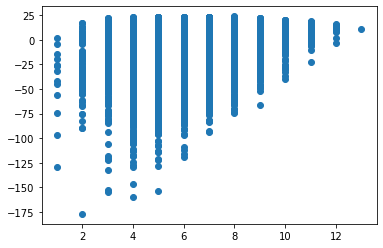

In [22]:
plt.scatter(lee.PerformanceHandler.Sum_feature_amount(X_featureset),y_classset)

find out the best possible feature set

In [23]:
y_classset.max()

24

In [24]:
X_featureset.iloc[y_classset.idxmax(),:]

0     1
1     0
2     0
3     0
4     0
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    1
Name: 2078, dtype: int64

In [26]:
lee.PerformanceHandler.Change_float_into_classes(score_scaled.mean(),1,40)#this is the cv value that we do not do feature selection

11

Now let's use Active learning to train a model to predict accuracy

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
learner = lee.PerformanceHandler.Use_AL_to_train_featureset(X,y,500,500,1000,40,pipe,RandomForestClassifier())

Accuracy after query 1: 0.2647
Accuracy after query 2: 0.2647
Accuracy after query 3: 0.2647
Accuracy after query 4: 0.2689
Accuracy after query 5: 0.2647
Accuracy after query 6: 0.2773
Accuracy after query 7: 0.2773
Accuracy after query 8: 0.2647
Accuracy after query 9: 0.2731
Accuracy after query 10: 0.2773
Accuracy after query 11: 0.2647
Accuracy after query 12: 0.2731
Accuracy after query 13: 0.2815
Accuracy after query 14: 0.2773
Accuracy after query 15: 0.2647
Accuracy after query 16: 0.2689
Accuracy after query 17: 0.2731
Accuracy after query 18: 0.2731
Accuracy after query 19: 0.2605
Accuracy after query 20: 0.2563
Accuracy after query 21: 0.2731
Accuracy after query 22: 0.2689
Accuracy after query 23: 0.2731
Accuracy after query 24: 0.2731
Accuracy after query 25: 0.2605
Accuracy after query 26: 0.2773
Accuracy after query 27: 0.2731
Accuracy after query 28: 0.2815
Accuracy after query 29: 0.2605
Accuracy after query 30: 0.2773
Accuracy after query 31: 0.2773
Accuracy after qu

In [29]:
from sklearn.ensemble import RandomForestClassifier
learner = lee.PerformanceHandler.Use_AL_to_train_featureset(X,y,1000,500,6000,10,pipe,RandomForestClassifier())

Accuracy after query 1: 0.5376
Accuracy after query 2: 0.5226
Accuracy after query 3: 0.5312
Accuracy after query 4: 0.5183
Accuracy after query 5: 0.5247
Accuracy after query 6: 0.5441
Accuracy after query 7: 0.5247
Accuracy after query 8: 0.5333
Accuracy after query 9: 0.5247
Accuracy after query 10: 0.5376
Accuracy after query 11: 0.5419
Accuracy after query 12: 0.5118
Accuracy after query 13: 0.5484
Accuracy after query 14: 0.5247
Accuracy after query 15: 0.5290
Accuracy after query 16: 0.5333
Accuracy after query 17: 0.5398
Accuracy after query 18: 0.5269
Accuracy after query 19: 0.5398
Accuracy after query 20: 0.5376
Accuracy after query 21: 0.5333
Accuracy after query 22: 0.5398
Accuracy after query 23: 0.5312
Accuracy after query 24: 0.5226
Accuracy after query 25: 0.5269
Accuracy after query 26: 0.5355
Accuracy after query 27: 0.5484
Accuracy after query 28: 0.5333
Accuracy after query 29: 0.5183
Accuracy after query 30: 0.5376
Accuracy after query 31: 0.5118
Accuracy after qu

In [ ]:
y